In [27]:
import pandas as pd

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split    
# from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression




In [29]:
data=pd.read_csv('Iris.csv')

In [30]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [33]:
data.shape

(150, 6)

In [34]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

ONE HOT ENCODED

In [35]:
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [36]:
correlation=data.corr()
corr_species=correlation['Species'].drop('Species')
corr_species.sort_values(ascending=False).abs()
# .plot(kind='bar', figsize=(10, 5), title='Correlation with Species')

PetalWidthCm     0.956464
PetalLengthCm    0.949043
Id               0.942830
SepalLengthCm    0.782561
SepalWidthCm     0.419446
Name: Species, dtype: float64

Logistic Regression

In [ ]:

features=data.drop(columns=['Species','Id'])
target=data['Species']

In [39]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [40]:
scaler=StandardScaler()
features_trained_scaled=scaler.fit_transform(features_train)
features_test_scaled=scaler.transform(features_test)

In [41]:
model=LogisticRegression(max_iter=200)
model.fit(features_trained_scaled,target_train)
predictions=model.predict(features_test_scaled)


In [42]:
accuracy=accuracy_score(target_test,predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


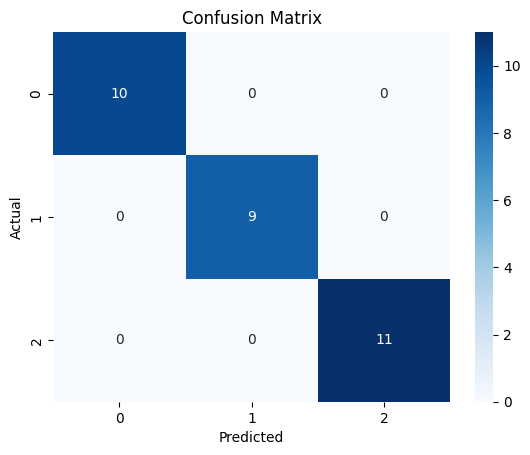

In [ ]:
cm = confusion_matrix(target_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
